# Feedback time series models

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set_context('talk')
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [3]:
#untie local dependency
import os
cwd = os.getcwd().split('\\')
local_repo_path = '\\'.join(cwd[:-1])
raw_data_path = local_repo_path + r'\data\raw'
processed_data_path = local_repo_path + '\data\processed'
feature_path = local_repo_path + r'\\data\\features'

In [128]:
output_feature_fname = 'Lookback2'
n_lookback = 2
sj_feature_train = pd.read_csv(feature_path + r'\\sj_train_Lookback_w_cases' + str(n_lookback) + '.csv', index_col=0).drop('var6(t)', axis = 1)
sj_feature_test = pd.read_csv(feature_path + r'\\sj_test_' + output_feature_fname + '.csv', index_col=0)
iq_feature_train = pd.read_csv(feature_path + r'\\iq_train_Lookback_w_cases' + str(n_lookback) + '.csv', index_col=0).drop('var6(t)', axis = 1)
iq_feature_test = pd.read_csv(feature_path + r'\\iq_test_' + output_feature_fname + '.csv', index_col=0)

In [129]:
sj_feature_train.head()

,var1(t-2),var2(t-2),var3(t-2),var4(t-2),var5(t-2),var6(t-2),var1(t-1),var2(t-1),var3(t-1),var4(t-1),var5(t-1),var6(t-1),total_cases
2,-1.081814,-1.183554,-0.759571,-1.272727,-0.542448,4.0,-0.559956,-0.583693,-0.214395,-0.272727,-0.541333,5.0,4
3,-0.559956,-0.583693,-0.214395,-0.272727,-0.541333,5.0,0.006304,-0.005017,-0.214395,0.000000,-0.530953,4.0,3
4,0.006304,-0.005017,-0.214395,0.000000,-0.530953,4.0,-0.061121,-0.053519,0.110260,0.227273,-0.510605,3.0,6
5,-0.061121,-0.053519,0.110260,0.227273,-0.510605,3.0,0.144991,0.146063,0.741194,0.500000,-0.479789,6.0,2
6,0.144991,0.146063,0.741194,0.500000,-0.479789,6.0,0.146087,0.157770,0.385911,0.500000,-0.438229,2.0,4


In [130]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import (ExtraTreesRegressor, RandomForestRegressor, 
                              AdaBoostRegressor, GradientBoostingRegressor)
from sklearn import neighbors
from sklearn.svm import SVR
from sklearn import linear_model
from sklearn.metrics import mean_absolute_error
from sklearn.neural_network import MLPRegressor

In [150]:
SVR_mod = SVR(kernel = 'linear')
lin_reg = linear_model.LinearRegression()
MLP_NN = MLPRegressor((100), max_iter = 100,learning_rate = 'adaptive', activation = 'relu')

In [151]:
def feedback_model(train, test, model, n_lookback = 10):
    for i in np.arange(len(test)):
        X = train.drop('total_cases', axis = 1)
        y = train['total_cases']
        scaler = MinMaxScaler(feature_range = (-1,1))
        scalerfit = scaler.fit(X)
        X = scaler.transform(X)
        model.fit(X,y)
        
        previous_timestep = pd.DataFrame(train.iloc[len(train)-1, :]).transpose()
        next_timestep = pd.DataFrame(test.drop(['city', 'year', 'weekofyear'], axis = 1).iloc[i,:]).transpose()
        for j in np.arange(1,n_lookback):
            #print(previous_timestep['var6(t-' + str(i) + ')'])
            next_timestep['var6(t-' + str(j+1) + ')'] = previous_timestep['var6(t-' + str(j) + ')'].values

            next_timestep['var6(t-1)'] = previous_timestep['total_cases'].values
            next_timestep['total_cases'] = -1
            
        X_next_timestep = scalerfit.transform(next_timestep.drop('total_cases', axis = 1))
       
        next_timestep['total_cases'] = model.predict(X_next_timestep)
        
            
        train = train.append(next_timestep).reset_index(drop = True)

        
        
        
    return(train)

In [ ]:
feedbacks = feedback_model(sj_feature_train, sj_feature_test, MLP_NN, n_lookback = 2)

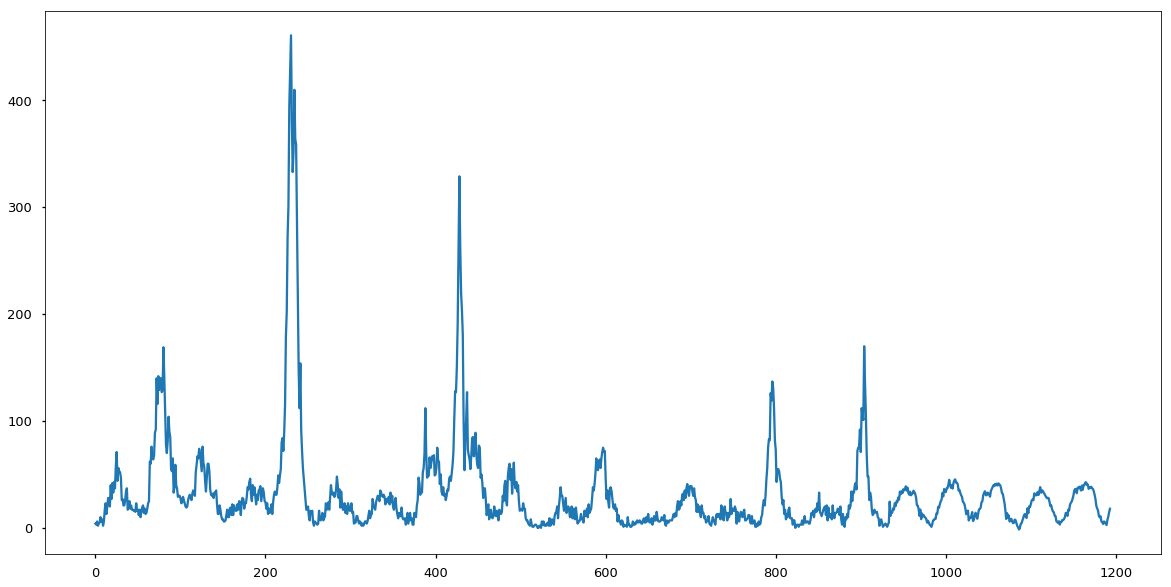

In [149]:
fig, ax = plt.subplots(figsize = (20,10))
feedbacks['total_cases'].plot(ax = ax)

In [ ]:
RF_mod.predict()

In [ ]:
scaler_iq = scaler.fit(iq_feature_train.drop('total_cases', axis = 1))
X_tr_iq = scaler_iq.transform(iq_feature_train.drop('total_cases', axis = 1))
Y_tr_iq = iq_feature_train['total_cases']

In [ ]:
    mod.fit(train.drop('total_cases', axis = 1), train['total_cases'])
    test_preds = mod.predict(test.drop(['city', 'year', 'weekofyear'], axis = 1))
    train_preds = mod.predict(train.drop('total_cases', axis = 1))